In [1]:
# program to compute the time
# of execution of any python code
import time
 
# we initialize the variable start
# to store the starting time of
# execution of program
start = time.time()

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose,\
                                    GlobalAveragePooling2D, AveragePooling2D, MaxPool2D, UpSampling2D,\
                                    BatchNormalization, Activation, ReLU, Flatten, Dense, Input,\
                                    Add, Multiply, concatenate, Softmax, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from tensorflow.keras.utils import img_to_array



In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# x is noisy data and y is clean data
SIZE = 256

from tqdm import tqdm
noisy_data=[]
path1 = r'D:\Sachin_MRI_Data\imagedata3'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    noisy_data.append(img_to_array(img))
    





100%|██████████| 181/181 [00:00<00:00, 811.48it/s]


In [5]:
clean_data=[]
path2 = r'D:\Sachin_MRI_Data\imagedata'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    clean_data.append(img_to_array(img))

noisy_train = np.reshape(noisy_data, (len(noisy_data), SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255.

clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255.


100%|██████████| 181/181 [00:00<00:00, 1077.14it/s]


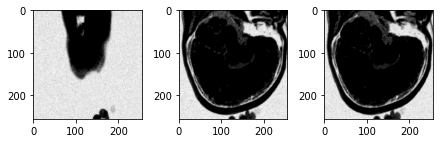

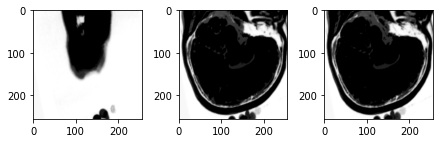

In [6]:
#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

 

In [7]:
inputs = Input((256,256, 1))
x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(inputs)
x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
x = Conv2D(1, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
x = concatenate([x,inputs])

In [8]:
conv1 = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
conv2 = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv1)

pool1 = AveragePooling2D(pool_size=(2,2),padding='same')(conv2)
conv3 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(pool1)
conv4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv3)
conv5 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv4)

pool2 = AveragePooling2D(pool_size=(2,2),padding='same')(conv5)
conv6 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(pool2)
conv7 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv6)
conv8 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv7)
conv9 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv8)
conv10 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv9)
conv11 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv10)

upsample1 = Conv2DTranspose(128, (3, 3), strides=2, activation="relu", kernel_initializer='he_normal',padding="same")(conv11)
add1 = Add()([upsample1,conv5])
conv12 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(add1)
conv13 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv12)
conv14 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv13)

upsample2 = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", kernel_initializer='he_normal',padding="same")(conv14)
add1 = Add()([upsample2,conv2])
conv15 = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(add1)
conv16 = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv15)

out = Conv2D(1, (1,1), kernel_initializer='he_normal',padding="same")(conv16)
out = Add()([out,inputs])

model = Model(inputs,out)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(1e-03), loss=tf.keras.losses.MeanSquaredError())
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 42)

history = model.fit(x_train, y_train, epochs=30, batch_size=1, shuffle=True, verbose = 1,validation_split = 0.1)

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))



Epoch 1/30
129/129 [==============================] - 12s 50ms/step - loss: 0.1360 - accuracy: 0.5994 - val_loss: 8.0750e-04 - val_accuracy: 0.5963
Epoch 2/30
129/129 [==============================] - 6s 47ms/step - loss: 5.9358e-04 - accuracy: 0.6040 - val_loss: 4.7504e-04 - val_accuracy: 0.5963
Epoch 3/30
129/129 [==============================] - 6s 47ms/step - loss: 4.6130e-04 - accuracy: 0.6040 - val_loss: 4.2633e-04 - val_accuracy: 0.5963
Epoch 4/30
129/129 [==============================] - 6s 47ms/step - loss: 4.2168e-04 - accuracy: 0.6040 - val_loss: 3.7179e-04 - val_accuracy: 0.5963
Epoch 5/30
129/129 [==============================] - 6s 49ms/step - loss: 3.7954e-04 - accuracy: 0.6040 - val_loss: 3.6738e-04 - val_accuracy: 0.5963
Epoch 6/30
129/129 [==============================] - 7s 51ms/step - loss: 3.6782e-04 - accuracy: 0.6040 - val_loss: 3.3157e-04 - val_accuracy: 0.5963
Epoch 7/30
129/129 [==============================] - 7s 52ms/step - loss: 3.5505e-04 - accuracy:

Text(0.5, 0, 'Epochs')

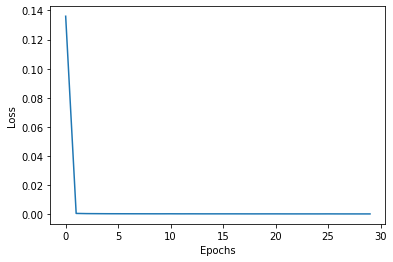

In [10]:
plt.plot(history.history['loss'])
plt.ylabel("Loss")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

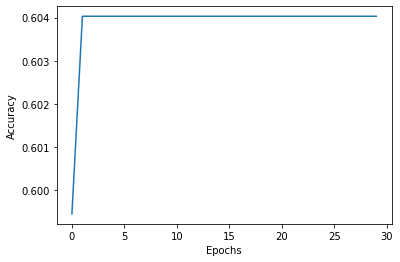

In [11]:
plt.plot(history.history['accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

In [12]:
y_train.shape

(144, 256, 256, 1)

INFO:tensorflow:Assets written to: denoising_autoencoder.model\assets


INFO:tensorflow:Assets written to: denoising_autoencoder.model\assets


2/2 [==============================] - 1s 620ms/step


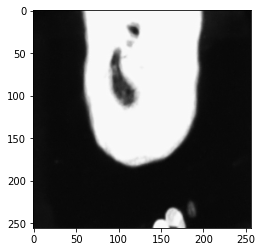

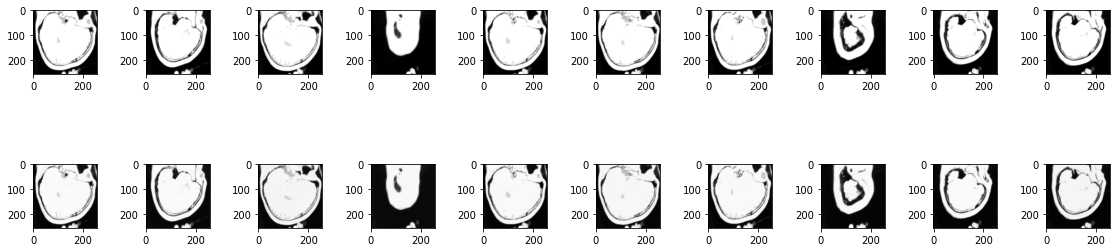

In [13]:
model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test)


plt.imshow(no_noise_img[i].reshape(SIZE,SIZE,1), cmap="gray")
#plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))


plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
plt.show()


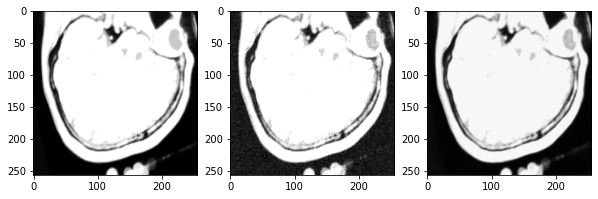

In [14]:
fig,axs = plt.subplots(1,3,figsize=(10,8))
axs[0].imshow(y_test[35],cmap='gray')
#axs[0].set_title("Original Image")
axs[1].imshow(x_test[35],cmap='gray')
#axs[1].set_title("5% Noisy Image ")
axs[2].imshow(no_noise_img[35],cmap='gray')
#axs[2].set_title("Denoised Image")

In [15]:
x_train.shape

(144, 256, 256, 1)

In [16]:
y_train.shape

(144, 256, 256, 1)

In [17]:
x_test.shape

(37, 256, 256, 1)

In [18]:
no_noise_img.shape

(37, 256, 256, 1)

In [19]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio
import bm3d
import cv2

In [20]:
import numpy as np
import skimage
from sewar import full_ref
from skimage import measure, metrics

In [21]:
no_noise_img.shape

(37, 256, 256, 1)

In [22]:
#skimage tools
#Mean square error
mse_scores = []
psnr_scores = []
rmse_scores = []
for i in range(len(y_test)):
    mse_scores.append(skimage.metrics.mean_squared_error(y_test[i], no_noise_img[i]))
    #print("MSE: based on scikit-image = ", mse_skimg)

    #Same as PSNR available in sewar
    psnr_scores.append(skimage.metrics.peak_signal_noise_ratio(y_test[i], no_noise_img[i], data_range=None))
    #print("PSNR: based on scikit-image = ", psnr_skimg)

    #Normalized root mean squared error
    rmse_scores.append(skimage.metrics.normalized_root_mse(y_test[i], no_noise_img[i]))
    #print("RMSE: based on scikit-image = ", rmse_skimg)

In [23]:
mse_scores[35]

0.00028227353468094284

In [24]:
psnr_scores[35]

35.49329838398688

In [25]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(y_test[35], no_noise_img[35],
                  data_range = no_noise_img[35].max() - no_noise_img[35].min(), 
                  multichannel = True)
print("SSIM: based on scikit-image = ", ssim_skimg)

SSIM: based on scikit-image =  0.96434516


C:\Users\Admin\AppData\Local\Temp\ipykernel_8156\2703763335.py:2: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_skimg = ssim(y_test[35], no_noise_img[35],


In [26]:
### Universal image quality index
"""calculates universal image quality index (uqi).
	:param GT: first (original) input image.
	:param P: second (deformed) input image.
	:param ws: sliding window size (default = 8).
	:returns:  float -- uqi value.
	"""
UQI_img = full_ref.uqi(y_test[35], no_noise_img[35], ws=8)
print("UQI: universal image quality index = ", UQI_img)

UQI: universal image quality index =  0.8927989623543741


In [27]:
# now we have initialized the variable
# end to store the ending time after
# execution of program
end = time.time()
 
# difference of start and end variables
# gives the time of execution of the
# program in between
print("The time of execution of above program is :", end-start)

The time of execution of above program is : 283.6357386112213
